In [1]:
# importar libreria
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# se crea el grapho: este es no direccionado
G = nx.Graph()

In [3]:
# se agregan nodos al grapho
G.add_nodes_from([1,2,3])

In [4]:
# devuelve una lista de nodos
G.nodes()

NodeView((1, 2, 3))

In [5]:
# se agregan los ejes
G.add_edge(1,2)
G.add_edge(3,2)

In [6]:
# devuelve una lista de tuplas con los nodos conectados por el eje
G.edges()

EdgeView([(1, 2), (2, 3)])

In [7]:
# se agrega al nodo 1 una label key con el valor blue (es como agregarle un valor a la key de un diccionario)
G.node[1]['label'] = 'blue'

In [8]:
# obtener una lista de nodos con la metadata asociada: devuelve un diccionario donde la key es el nodo. 
# despues esta la metadata en otro diccionario donde la llave es la etiqueta y despues esta el valor
G.nodes(data=True)

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

In [9]:
list(G.nodes(data=True))[0][1]

{'label': 'blue'}

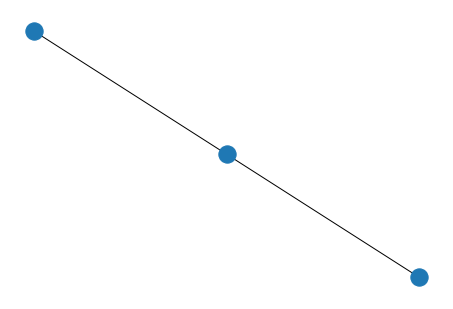

In [10]:
# Draw function
nx.draw(G)
plt.show()

In [11]:
# Agregamos la misma key al resto de los nodos con algun valor
G.node[2]['label'] = 'red'

In [12]:
G.node[3]['label'] = 'gren'

In [13]:
G.nodes(data=True)

NodeDataView({1: {'label': 'blue'}, 2: {'label': 'red'}, 3: {'label': 'gren'}})

In [14]:
# Filtramos por condicion (usando una list por comprension). Para eso se accede al diccionario de la metadata via "key"
[n for n,d in G.nodes(data=True) if d['label'] == 'red']

[2]

In [15]:
# Se agrega una key:value a los edge. Para acceder se usa una lista con los nodos que une el edge
G.edges[1,2]['condicion']=78
G.edges[3,2]['condicion']=92

In [16]:
# ejemplo de como filtrar con listas por comprension atributos de un edge
[(u,v) for u,v,d in G.edges(data=True) if d['condicion'] > 90]

[(2, 3)]

In [17]:
# Grafo no direccionado
type(G)

networkx.classes.graph.Graph

In [18]:
# Grafo direccionado
D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

In [19]:
# Multi-edge (Directed) graphs 
M = nx.MultiGraph()
type(M)

networkx.classes.multigraph.MultiGraph

In [20]:
MD = nx.MultiDiGraph()
type(MD)

networkx.classes.multidigraph.MultiDiGraph

In [21]:
# WEIGHTS
# Setear el peso de un edge
G.edges[1,2]['weight'] = 2

In [22]:
# Iterar sobre la metadata de todos los ejes
for u,v,d in G.edges(data=True):
    
    # Check if node 3 is involved:
    if 3 in [u,v]:
        
        # Cambiarle el valor del peso
        d['weight'] = 1.1

In [23]:
# Como encontrar self loops?

def find_selfloop_node(G):
    '''
    Finds all nodes that have self-loops in the graph G
    '''
    
    nodes_in_selfloops = []
    
    # Iterar sobre todos los ejes de G
    for u,v in G.edges():
        
        # Chequear si el nodo u y el nodo v son iguales:
        if u == v:
            nodes_in_selfloops.append(u)
            
    return nodes_in_selfloops

In [24]:
# No hay ningun selfloop
len(find_selfloop_node(G))

0

In [25]:
# No devuelve error porque esta ok
assert G.number_of_selfloops() == len(find_selfloop_node(G))

# GRAFICOS: Arcplot, Matrix plot y Circle plot

In [26]:
import nxviz as nv

In [27]:
# Verficiar que este nxviz en el directorio
#! conda list

##### ARCPLOT 

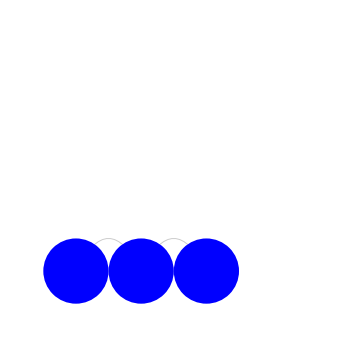

In [28]:
# Arcplot
from nxviz import ArcPlot
ap = nv.ArcPlot(G)

# Draw m to the screen
ap.draw()

# Display the plot
plt.show()

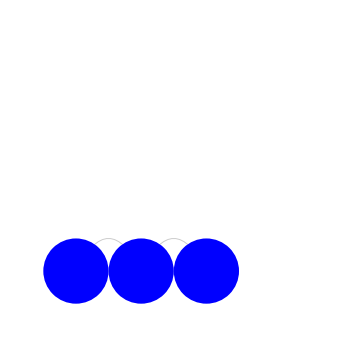

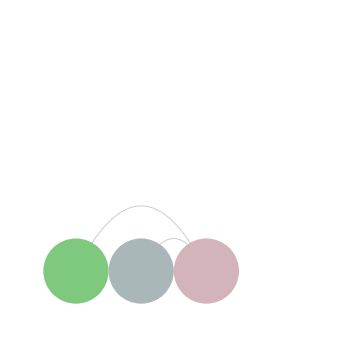

In [29]:
# Import necessary modules
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(G)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
a2 = ArcPlot(G, node_order='label', node_color='label')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()

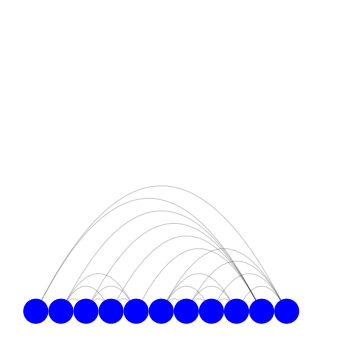

In [104]:
from nxviz.plots import ArcPlot

# Iterate over all the nodes in G, including the metadata

# Probar mismo Arcplot con el grafo Q que se crea al final de la notebook. Es para ver otro tipo de Arcplot y que no estalle.
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G,n)

# Create the ArcPlot object: a
a = ArcPlot(graph=G, node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

#### MATRIXPLOT 

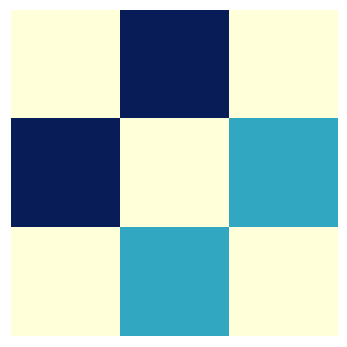

In [30]:
# Matrixplot 
m = nv.MatrixPlot(G)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

In [31]:
# Convertimos a G en una matriz (1 indica si hay edge entre nodos)
A = nx.to_numpy_matrix(G)

In [32]:
A

matrix([[0. , 2. , 0. ],
        [2. , 0. , 1.1],
        [0. , 1.1, 0. ]])

In [33]:
# Convertimos a G de nuevo al formtato NetworkX como un grafo dirigido: A_conv
A_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

In [34]:
A_conv

In [35]:
# Check that the `category` metadata field is lost from each node
for n, d in A_conv.nodes(data=True):
    assert 'category' not in d.keys()

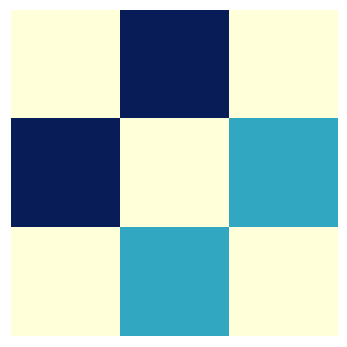

In [36]:
Ac = nv.MatrixPlot(A_conv)
Ac.draw()
plt.show()

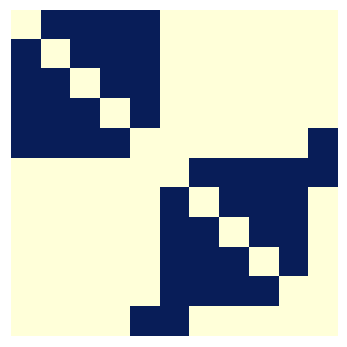

In [97]:
from nxviz import MatrixPlot

# Calculate the largest connected component subgraph: largest_ccs. Python's 
# built-in sorted() function takes an iterable and returns a sorted list (in ascending order, by default). 
# Therefore, to access the largest connected component subgraph, the statement is sliced with [-1]
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Probar misma matriz con el grafo Q que se crea al final de la notebook. Es para ver otro tipo de matrixplot.

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph=largest_ccs) # Tambien se pueden incluir otros parametros como node_grouping = 'grouping'

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

##### CIRCOSPLOT 

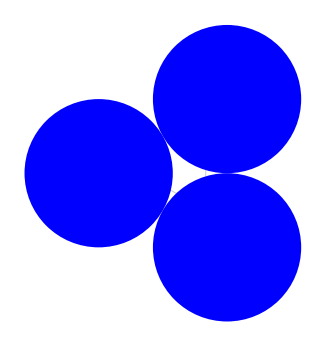

In [37]:
# Circos plot
from nxviz import CircosPlot 
c = CircosPlot(G)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

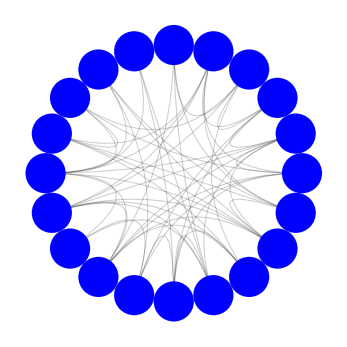

In [78]:
U = nx.erdos_renyi_graph(n=20,p=0.3)

circ = nv.CircosPlot(U)

circ.draw()

In [81]:
#U = nx.erdos_renyi_graph(n=20,p=0.3)

# Con parametros para estilizar el grafo
#circ = nv.CircosPlot(U, node_color='key_a_definir', node_group='key_a_definir')

#circ.draw()

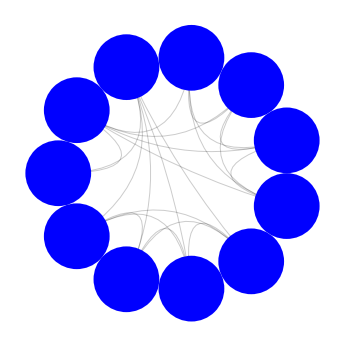

In [108]:
from nxviz import CircosPlot

# Iterate over all the nodes, including the metadata

# Probar mismo Arcplot con el grafo Q que se crea al final de la notebook. Es para que no estalle.
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G,n)

# Create the CircosPlot object: c
c = CircosPlot(G,node_order='degree')#,node_grouping='grouping',node_color='grouping')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

# METRICAS IMPORTANTES

## 1) Degree centrality

In [38]:
# Degree centrality: la cantidad de vecinos que tengo sobre la cantidad que podria tener
G.edges()

EdgeView([(1, 2), (2, 3)])

In [39]:
# devuelve los nodos vecinos del especificado en el metodo
list(G.neighbors(2))

[1, 3]

In [40]:
# The key is the node and the value the centrality value
nx.degree_centrality(G)

{1: 0.5, 2: 1.0, 3: 0.5}

In [41]:
# Funcion para obtener nodos segun la cantidad de vecinos
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(G, 1)
print(six_nbrs)

{1, 3}


In [42]:
# Compute the degree of every node: degrees
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

# Print the degrees
print(degrees)

[1, 2, 1]


In [43]:
# Devuelve un diccionario donde la key es el nodo y el valor es el degree centrality (Neighbors/possible neighbors). En una red de transporte el nodo mismo es considerado como un self loop que entra en los nodos posibles
deg_cent = nx.degree_centrality(G)

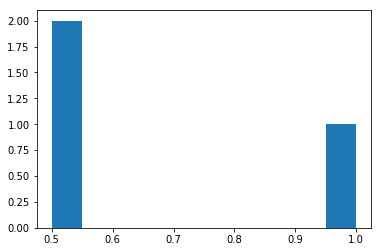

In [44]:
# Devuelve un histograma con la distribucion del degree centrality
plt.hist(list(deg_cent.values()));

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

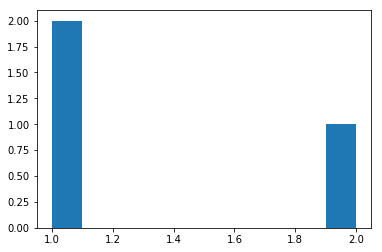

In [45]:
# Plot a histogram of the degree distribution of the graph
plt.hist([len(list(G.neighbors(n))) for n in G.nodes()])

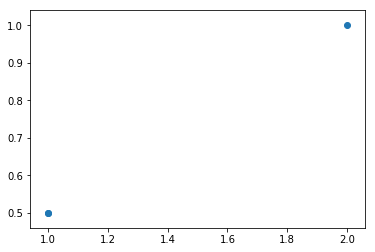

In [46]:
# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(x=degrees, y=list(deg_cent.values()))
plt.show()

In [47]:
G.nodes()

NodeView((1, 2, 3))

In [48]:
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()

    # Initialize the queue of cells to visit with the first node: queue
    queue = [node1]

    # Iterate over the nodes in the queue
    for node in queue:

        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            
        else:
            # Add current node to visited nodes
            visited_nodes.add(node)

            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])
            print('Path doesn\'t exists between nodes {0} and {1}'.format(node1, node2))
            return visited_nodes
        
        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

In [49]:
print(path_exists(G,3,1))

Path doesn't exists between nodes 3 and 1
{3}


In [114]:
# Devolver el nodo con mayor degree centrality

# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if n == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

[1]


## 2) Degree + Betweenes centrality 

In [50]:
# Betweeness centrality
# M1 es el numero de nodos en el extremo final y m2 la cantidad de nodos en el puente entre ambos
Q = nx.barbell_graph(m1=5, m2=1)

# La key es el nodo y el valr es el betweenness centrality
nx.betweenness_centrality(G)

{1: 0.0, 2: 1.0, 3: 0.0}

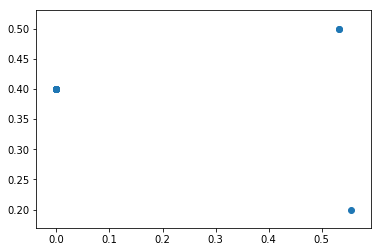

In [51]:
# Compute the betweenness centrality of G: bet_cen
bet_cen = nx.betweenness_centrality(Q)

# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(Q)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(x=list(bet_cen.values()), y=list(deg_cen.values()))

# Display the plot
plt.show()

In [52]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Find the node(s) that has the highest degree centrality in G: top_dc
top_dc = find_nodes_with_highest_deg_cent(Q)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(Q)[node] == max(nx.degree_centrality(Q).values())

{4, 6}


#### CON ESTA FUNCION SE PODRIA ENCONTAR EL NODO CON MAYOR BETWEENNESS CENTARLITY EN TODA LA RED DE BICIS 

In [53]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(Q)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(Q)[node] == max(nx.betweenness_centrality(Q).values())

# PATH FINDING

## 1) Triangulos 

In [54]:
from itertools import combinations

In [55]:
# Iterar sobre every pair of nodes and not only every edge
for n1, n2 in combinations(Q.nodes(),2):
    print(n1,n2)

0 1
0 2
0 3
0 4
0 6
0 7
0 8
0 9
0 10
0 5
1 2
1 3
1 4
1 6
1 7
1 8
1 9
1 10
1 5
2 3
2 4
2 6
2 7
2 8
2 9
2 10
2 5
3 4
3 6
3 7
3 8
3 9
3 10
3 5
4 6
4 7
4 8
4 9
4 10
4 5
6 7
6 8
6 9
6 10
6 5
7 8
7 9
7 10
7 5
8 9
8 10
8 5
9 10
9 5
10 5


In [56]:
# Define is_in_triangle(): podria servir para encontrar cliques entre las estaciones
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1,n2):
            in_triangle = True
            break
    return in_triangle

In [57]:
is_in_triangle(Q,2)

True

In [58]:
#Finding nodes involved in triangles

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1,n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

# Write the assertion statement
assert len(nodes_in_triangle(Q, 1)) == 5

In [59]:
#Finding open triangles

# Define node_in_open_triangle(G,n)
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1,n2):

            in_open_triangle = True

            break

    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in Q.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(Q,n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)

3


## 2) Cliques y maximal cliques 

In [60]:
# Finding maximal cliques
Z = nx.barbell_graph(m1=5, m2=1)

nx.find_cliques(Z)

# Lista con los maximal cliques
list(nx.find_cliques(Z))

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]

In [61]:
nx.find_cliques(Z)

<generator object find_cliques at 0x000002271B0EBDB0>

In [62]:
#Finding all maximal cliques of size "n"

# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(Z, 3)) == 33

AssertionError: 

In [63]:
# En el grafo Z hay dos maximal cliques de 5 nodos
maximal_cliques(Z, 5)

[[4, 0, 1, 2, 3], [6, 7, 8, 9, 10]]

In [64]:
# n es la cantidad de nodos y p la probabilidad que exista un eje entre un par de nodos
E = nx.erdos_renyi_graph(n=20, p=0.2)

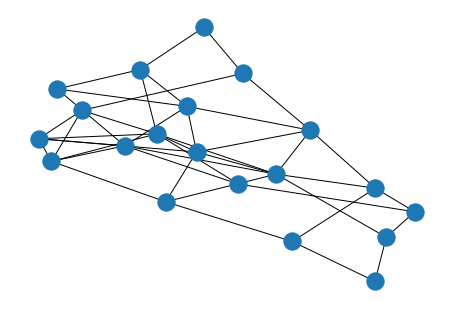

In [65]:
nx.draw(E)

In [66]:
# Genera un grafo de manera probabilistica. En el caso anterior, 20 nodos con 37 edges
list(E.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [67]:
# Vamos a plotear el nodo 8 y sus vecinos

# Definimos los vecinos del nodo 8
nodes = list(E.neighbors(8))

# se agregan el nodo 8 a la lista con sus vecinos
nodes.append(8)

In [68]:
# Almacenamos la lista conteniendo el nodo 8 con sus vecinos en un subgrafo
E_ocho = E.subgraph(nodes)

# Vemos sus ejes: tambien devuelve los ejes que tienen los vecinos de 8 (con otros nodos distintos)
E_ocho.edges()

EdgeView([(3, 8), (3, 12), (8, 12), (8, 14), (8, 17)])

In [69]:
# Ambos grafos tienen el mismo datatype
E

In [70]:
E_ocho

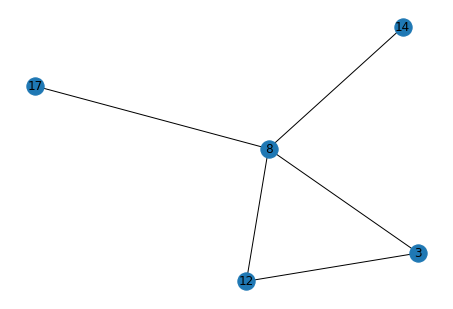

In [71]:
# ploteamos el subgrafo: se le pasa el grafo como objeto
nx.draw(E_ocho, with_labels=True)

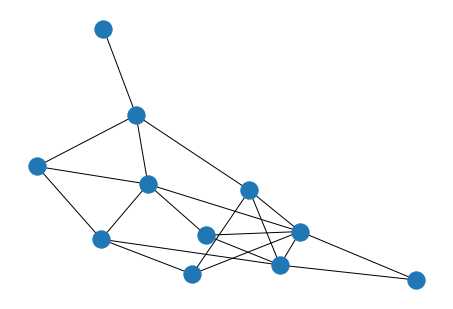

In [72]:
# SUBGRAFO I

nodes_of_interest = [12, 8, 7]

# Define get_nodes_and_nbrs()

def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: E_draw
E_draw = get_nodes_and_nbrs(E, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(E_draw)
plt.show()

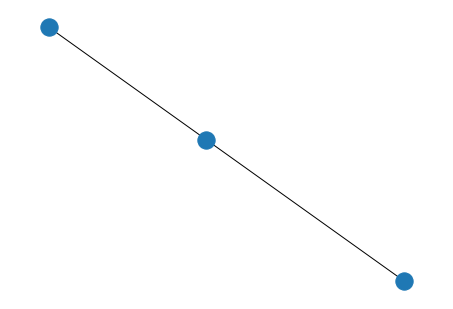

In [76]:
# SUBGRAFO II: extract nodes that have a particular metadata property and their neighbors

# Extract the nodes of interest using the metadata with a comprehension list
nodes = [n for n, d in G.nodes(data=True) if d['label'] == 'red']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = G.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: G_sub
G_sub = G.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(G_sub)
plt.show()

In [82]:
# CONNECTED COMPONENTS SUBGRAPH

# Se crea el grafo
K = nx.erdos_renyi_graph(n=100,p=0.03)

In [84]:
nx.connected_component_subgraphs(K)

<generator object connected_component_subgraphs at 0x000002271C36BC50>

In [85]:
# lo casteamos como lista para ver todos los "connected_component_subgraphs": hay cinco subgrafos
list(nx.connected_component_subgraphs(K))

In [86]:
# Hay 5 componentes en el subgraph. De esos componentes, a 4 no se podria acceder desde ninguno de los nodos del componente con 96. Es decir, estan aislados. No estan conectados por ningun edge
for n in list(nx.connected_component_subgraphs(K)):
    print(len(n.nodes()))

96
1
1
1
1


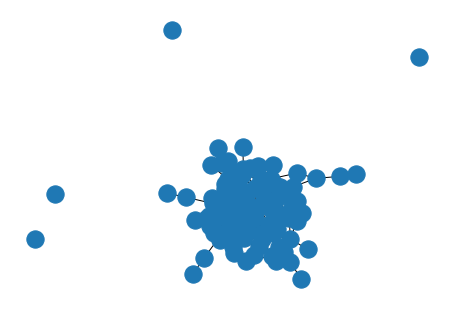

In [87]:
nx.draw(K)

In [109]:
# Finding a clique
Y = nx.erdos_renyi_graph(n=100, p=0.15)

nx.find_cliques(Y)

<generator object find_cliques at 0x000002271B2330F8>

In [110]:
list(nx.find_cliques(Y))

[[0, 99, 71],
 [0, 99, 55],
 [0, 72, 97],
 [0, 10],
 [0, 78],
 [0, 19],
 [0, 24, 96, 12],
 [0, 24, 97],
 [0, 92],
 [1, 35, 32, 15],
 [1, 35, 10],
 [1, 35, 63],
 [1, 5, 45],
 [1, 5, 47],
 [1, 40, 56],
 [1, 40, 45],
 [1, 40, 94, 15],
 [1, 10, 11],
 [1, 11, 61],
 [1, 11, 15],
 [1, 15, 54],
 [1, 16, 56],
 [1, 79, 53],
 [1, 84, 56],
 [1, 84, 88],
 [1, 53, 98],
 [1, 54, 47, 88, 57],
 [1, 54, 63],
 [1, 24, 45],
 [1, 57, 56],
 [1, 56, 61],
 [1, 92, 32],
 [1, 92, 61, 98],
 [1, 92, 61, 69],
 [1, 92, 61, 45],
 [1, 92, 94, 47],
 [1, 63, 94],
 [2, 33],
 [2, 98, 21],
 [2, 99, 80],
 [2, 99, 25],
 [2, 99, 34],
 [2, 99, 75],
 [2, 7, 25],
 [2, 7, 74],
 [2, 75, 64],
 [2, 75, 48],
 [2, 75, 90],
 [2, 48, 94],
 [2, 80, 74],
 [2, 21, 34],
 [2, 21, 74],
 [2, 88, 64, 54],
 [2, 88, 34],
 [2, 88, 74],
 [2, 88, 87],
 [2, 91, 64],
 [2, 91, 87],
 [3, 65, 27],
 [3, 65, 21],
 [3, 65, 39],
 [3, 5, 29],
 [3, 5, 66],
 [3, 5, 21],
 [3, 5, 45, 49],
 [3, 39, 10],
 [3, 39, 91],
 [3, 39, 29],
 [3, 14, 51],
 [3, 14, 91],
 [3,

In [111]:
for clique in nx.find_cliques(Y):
    print(len(clique))

3
3
3
2
2
2
4
3
2
4
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
5
3
3
3
3
3
4
4
4
4
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
2
3
3
3
3
2
2
2
3
3
3
3
3
3
2
3
3
3
4
3
2
3
3
3
3
3
3
3
3
4
4
4
4
3
3
3
3
4
4
4
3
4
4
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
2
2
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
4
4
3
3
3
3
3
2
2
3
3
3
2
3
3
3
3
2
3
3
3
4
3
3
3
3
3
3
3
3
2
3
3
2
3
3
3
3
3
2
3
2
3
3
4
4
3
2
3
3
3
3
3
2
3
4
4
3
4
4
4
2
3
2
3
3
2
3
3
3
3
3
3
3
2
3
3
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
2
3
3
2
3
3
3
3
4
3
3
2
3
3
2
2
2
3
2
2
2
3
3
3
2
3
3
4
3
2
3
3
3
3
3
3
3
4
4
3
3
3
3
4
3
3
2
2
3
3
3
3
3
3
2
3
3
2
3
2
3
3
2
3
3
3
3
2
3
3
3
2
3
3
3
3
3
3
2
3
3
3
3
3
2
3
3
3
3
3
3
3
3
2
2
2
4
3
2
3
4
4
3
2
3
4
3
2
3
2
3
3
3
3
3
3
3
2
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
3
3
3
2
3
3
3
3
3
3
2
2
3
4
3
4
3
3
2
3
2
3
3
3
3
2
2
3
3
2
2
2
2
3
3
2
3
2
3
2
3
2
2
2
3


In [112]:
# Maximal cliques
cliques = nx.find_cliques(Y)

# Count and print the number of maximal cliques in Y
print(len(list(cliques)))

502


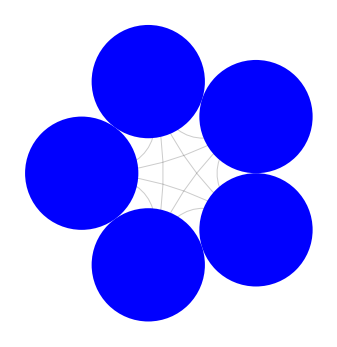

In [113]:
# Finding a particular maximal clique

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(Y), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: Y_lc
Y_lc = Y.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(Y_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

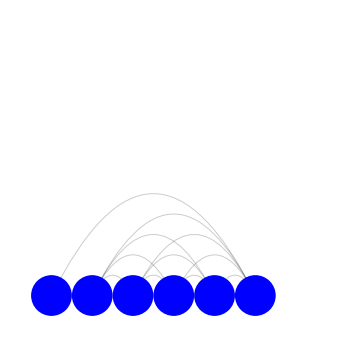

In [116]:
# Caracterizar comunidades

# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(Q), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: Q_lmc
Q_lmc = Q.subgraph(largest_max_clique).copy()

# Go out 1 degree of separation
for node in list(Q_lmc.nodes()):
    Q_lmc.add_nodes_from(Q.neighbors(node))
    Q_lmc.add_edges_from(zip([node]*len(list(Q.neighbors(node))), Q.neighbors(node)))

# Record each node's degree centrality score
for n in Q_lmc.nodes():
    Q_lmc.node[n]['degree centrality'] = nx.degree_centrality(Q_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(Q_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()